In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/face-mask-dataset


In [3]:
import os

print("Contents of dataset folder:")
print(os.listdir(path))


Contents of dataset folder:
['data']


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
# Step 1: Confirm "data" folder is present
data_folder = os.path.join(path, "data")
print("Contents of 'data' folder:", os.listdir(data_folder))


Contents of 'data' folder: ['without_mask', 'with_mask']


In [6]:
with_mask_path=os.path.join(data_folder,"with_mask")
without_mask_path=os.path.join(data_folder,"without_mask")
print('Path of with_mask folder :',with_mask_path)
print('Path of without_mask folder :',without_mask_path)

Path of with_mask folder : /kaggle/input/face-mask-dataset/data/with_mask
Path of without_mask folder : /kaggle/input/face-mask-dataset/data/without_mask


In [7]:
with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)

In [8]:
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [9]:
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [10]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


with_mask --> 1

without_mask --> 0

In [11]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


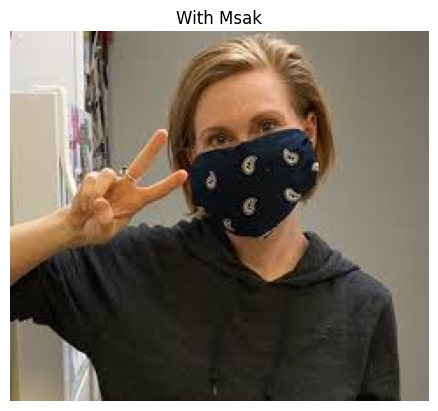

In [16]:

# Display one image from the 'with_mask' folder
sample_image_name = with_mask_files[3]
sample_image_path = os.path.join(with_mask_path, sample_image_name)

# Read the image
img = mpimg.imread(sample_image_path)

# Display the image
plt.imshow(img)
plt.title('With Msak')
plt.axis('off') # Hide axis
plt.show()

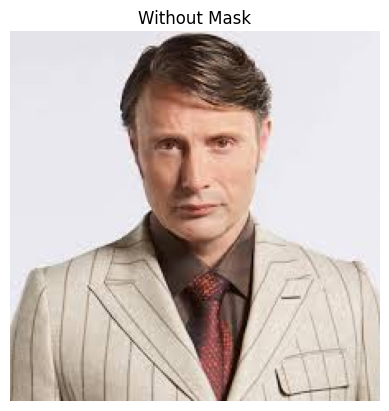

In [19]:
# Display one image from the 'with_mask' folder
sample_image_name = without_mask_files[1]
sample_image_path = os.path.join(without_mask_path, sample_image_name)

# Read the image
img = mpimg.imread(sample_image_path)

# Display the image
plt.imshow(img)
plt.title('Without Mask')
plt.axis('off') # Hide axis
plt.show()

In [13]:
data =[]

for img_files in with_mask_files:
  image = Image.open(with_mask_path+"/"+img_files)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


for img_files in without_mask_files:
  image = Image.open(without_mask_path+"/"+img_files)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
len(data)

7553

array([[[189, 184, 181],
        [232, 227, 224],
        [227, 222, 219],
        ...,
        [110, 102,  91],
        [110, 102,  91],
        [110, 102,  91]],

       [[193, 188, 185],
        [229, 224, 221],
        [225, 220, 217],
        ...,
        [111, 103,  92],
        [111, 103,  92],
        [111, 103,  92]],

       [[213, 208, 205],
        [228, 223, 220],
        [223, 218, 215],
        ...,
        [112, 104,  93],
        [112, 104,  93],
        [112, 104,  93]],

       ...,

       [[116, 102,  65],
        [134, 120,  83],
        [145, 131,  95],
        ...,
        [132, 124, 113],
        [131, 123, 112],
        [131, 123, 112]],

       [[119, 105,  66],
        [136, 122,  83],
        [143, 129,  92],
        ...,
        [132, 124, 113],
        [131, 123, 112],
        [131, 123, 112]],

       [[119, 105,  66],
        [136, 122,  83],
        [142, 128,  91],
        ...,
        [132, 124, 113],
        [131, 123, 112],
        [131, 123, 112]]], dtype=uint8)
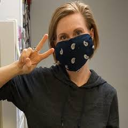

In [22]:
data[3]

In [23]:
type(data)

list

In [14]:
X = np.array(data)
y = np.array(labels)

In [25]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [16]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [28]:
print(X_train_scaled[0])

[[[0.18823529 0.18823529 0.23529412]
  [0.16862745 0.16862745 0.21176471]
  [0.14117647 0.14117647 0.18039216]
  ...
  [0.36078431 0.30196078 0.2745098 ]
  [0.36470588 0.30980392 0.28235294]
  [0.36862745 0.31764706 0.28627451]]

 [[0.18823529 0.18823529 0.23529412]
  [0.16862745 0.16862745 0.21568627]
  [0.14117647 0.14117647 0.18039216]
  ...
  [0.36078431 0.30196078 0.2745098 ]
  [0.36470588 0.30980392 0.27843137]
  [0.36862745 0.31764706 0.28627451]]

 [[0.17647059 0.17647059 0.22352941]
  [0.14901961 0.14901961 0.19215686]
  [0.12156863 0.12156863 0.16078431]
  ...
  [0.36862745 0.30980392 0.29019608]
  [0.36470588 0.30588235 0.28235294]
  [0.36470588 0.30588235 0.27843137]]

 ...

 [[0.05882353 0.0627451  0.08235294]
  [0.05882353 0.0627451  0.08235294]
  [0.0627451  0.06666667 0.08627451]
  ...
  [0.0627451  0.06666667 0.08235294]
  [0.06666667 0.07058824 0.08627451]
  [0.06666667 0.07058824 0.08627451]]

 [[0.05490196 0.05882353 0.07843137]
  [0.05490196 0.05882353 0.07843137]


In [29]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)


In [30]:
print(y_train.shape)

(6042,)


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [18]:
# Model setup
base_model = MobileNetV2(input_shape=(128,128,3), include_top=False, weights='imagenet')
base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])





In [19]:
history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step - accuracy: 0.7763 - loss: 0.4970 - val_accuracy: 0.9768 - val_loss: 0.0770
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9649 - loss: 0.1024 - val_accuracy: 0.9821 - val_loss: 0.0551
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9748 - loss: 0.0738 - val_accuracy: 0.9828 - val_loss: 0.0465
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9795 - loss: 0.0587 - val_accuracy: 0.9828 - val_loss: 0.0478
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9823 - loss: 0.0490 - val_accuracy: 0.9881 - val_loss: 0.0394


In [20]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")


48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step


In [21]:
# Accuracy
loss, acc = model.evaluate(X_test_scaled, y_test)
print(f"Validation Accuracy: {acc:.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9907 - loss: 0.0364
Validation Accuracy: 0.9881


In [37]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       768
           1       0.98      0.99      0.99       743

    accuracy                           0.99      1511
   macro avg       0.99      0.99      0.99      1511
weighted avg       0.99      0.99      0.99      1511



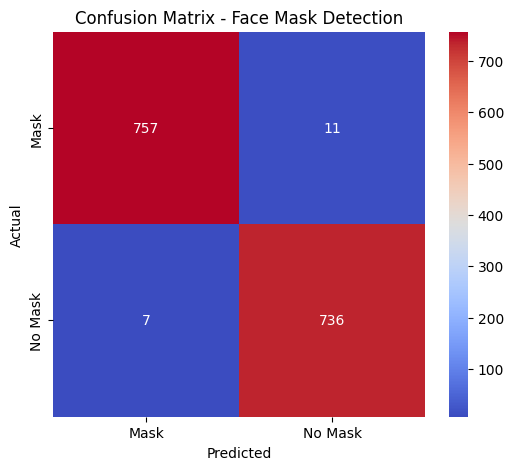

In [22]:
# 🧮 Compute confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_classes)

# 📊 Plot using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=["Mask", "No Mask"],
            yticklabels=["Mask", "No Mask"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Face Mask Detection")
plt.show()


In [23]:
model.save("face_mask_mobilenetv2.h5")
print("Model saved successfully!")


Model saved successfully!


In [40]:
import cv2
from tensorflow.keras.models import load_model

# Load model
model = load_model("face_mask_mobilenetv2.h5")
model
# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(0)  # Use 0 for default camera

while True:
    ret, frame = cap.read()
    if not ret:
        break

    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=4)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (128,128))
        face_normalized = face_resized / 255.0
        face_input = np.expand_dims(face_normalized, axis=0)

        prediction = model.predict(face_input)[0][0]
        label = "Mask" if prediction < 0.5 else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)

    cv2.imshow("Face Mask Detector", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [24]:
import cv2

cap = cv2.VideoCapture(0)  # Try 1 or 2 if 0 doesn't work

if not cap.isOpened():
    print("❌ Failed to access the webcam. Trying other indices...")

for i in range(3):
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        print(f"✅ Webcam opened at index {i}")
        break
else:
    print("❌ Could not open any webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to read frame.")
        break
    cv2.imshow("Test Camera", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


❌ Failed to access the webcam. Trying other indices...
❌ Could not open any webcam.
❌ Failed to read frame.
